# Create a NEMA phantom
Note we will sample to a 1 mm resolution.  The phantom consists of:

- 4 radioactive spheres of radii 4, 6.5, 8.5, and 11 mm
- 2 cold spheres of radii 14, 18.5 mm
- a cold central cylinder of radius 20 mm and z-length of 100 mm
- all spheres placed at a radial distance of 114.4 mm from the center of the volume, centered axially
- "radioactive" elements have 4 times the activity of "cold" elements 

In [1]:
%matplotlib inline

import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import antea.mcsim.phantom as ph

### Construct the phantom

In [2]:
# Create the main volume.
nema = ph.phantom(180,180,180)

# Create the different components of the phantom.
sph_r1 = ph.create_sphere(4)*3
sph_r2 = ph.create_sphere(6.5)*3
sph_r3 = ph.create_sphere(8.5)*3
sph_r4 = ph.create_sphere(11)*3

sph_c1 = ph.create_sphere(14.0)*-1
sph_c2 = ph.create_sphere(18.5)*-1

cyl = ph.create_cylinder(22,20)*-1
bg  = ph.create_sphere(85)*1       # Note: may take a long time

# Position them in the main volume.
r_pos = 50

xoff = np.rint(r_pos).astype('int'); yoff = 0
nema.add_to_vol(sph_c2,xoff,yoff,0)
xoff = np.rint(np.cos(np.pi/3)*r_pos).astype('int'); yoff = np.rint(np.sin(np.pi/3)*r_pos).astype('int')
nema.add_to_vol(sph_r1,xoff,yoff,0)
xoff = np.rint(np.cos(2*np.pi/3)*r_pos).astype('int'); yoff = np.rint(np.sin(2*np.pi/3)*r_pos).astype('int')
nema.add_to_vol(sph_r2,xoff,yoff,0)
xoff = np.rint(np.cos(np.pi)*r_pos).astype('int'); yoff = np.rint(np.sin(np.pi)*r_pos).astype('int')
nema.add_to_vol(sph_r3,xoff,yoff,0)
xoff = np.rint(np.cos(4*np.pi/3)*r_pos).astype('int'); yoff = np.rint(np.sin(4*np.pi/3)*r_pos).astype('int')
nema.add_to_vol(sph_r4,xoff,yoff,0)
xoff = np.rint(np.cos(5*np.pi/3)*r_pos).astype('int'); yoff = np.rint(np.sin(5*np.pi/3)*r_pos).astype('int')
nema.add_to_vol(sph_c1,xoff,yoff,0)

nema.add_to_vol(cyl,0,0,0)
nema.add_to_vol(bg,0,0,0)

### Plot the phantom

Text(0, 0.5, 'y (mm)')

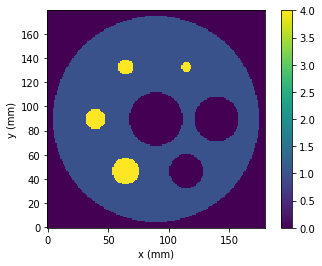

In [3]:
# Get the volume and plot the central slice.
vol = nema.get_volume()
plt.imshow(vol[:,:,89].transpose(),origin='lower')
plt.colorbar()
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

Text(0, 0.5, 'Intensity')

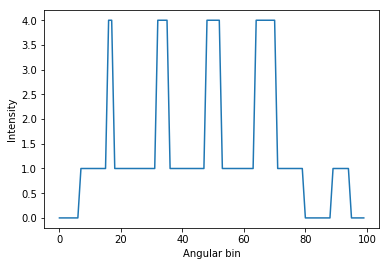

In [4]:
prof = ph.circular_profile(vol[:,:,89],50,100)
plt.plot(range(len(prof)),prof)
plt.xlabel("Angular bin")
plt.ylabel("Intensity")

### Save the phantom to a numpy file, and its corresponding cumulative distribution to a binary file

In [5]:
# Save the phantom to file.
nema.save_numpy("phantom_NEMAlike.npz")
nema.save_cdist_binary("phantom_NEMAlike.dat")